# Modelagem Estatística em indicadores socioeconomicos

**Objetivo:** estudar quais são os indicadores socioeconômicos que impactam a expectativa de vida das pessoas.

Os dados foram extraídos do link abaixo:

https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-life-expectancy-and-healthy-life-expectancy


In [21]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings("ignore")

In [44]:
dados = pd.read_csv("/home/priscila/Downloads/1-Mat/dados/dataset_mat_p6.csv")
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [33]:
dados.shape

(2938, 22)

In [45]:
dados.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [46]:
## Ajuste inicial dos dados
# Renomeando colunas
dados = dados.rename(columns={'Country': 'pais', 
                              'Year': 'ano',
                              'Status': 'status',
                              'Life expectancy ': 'expectativa_vida',
                              'Adult Mortality': 'mortalidade_adulta',
                              'infant deaths': 'mortalidade_infantil',
                              'Alcohol': 'alcool',
                              'percentage expenditure': 'percentual_gasto',
                              'Hepatitis B': 'hepatite_b',
                              'Measles ': 'sarampo',
                              ' BMI ': 'imc',
                              'under-five deaths ': 'mortalidade_menores_5_anos',
                              'Polio': 'polio',
                              'Total expenditure': 'gasto_total',
                              'Diphtheria ': 'difteria',
                              ' HIV/AIDS': 'hiv_aids',
                              'GDP': 'pib',
                              ' Population': 'populacao',
                              ' thinness  1-19 years': 'magreza_19',
                              ' thinness 5-9 years': 'magreza_9',
                              'Income composition of resources': 'composicao_renda',
                              'Schooling': 'escolaridade'})

In [47]:
dados.columns

Index(['pais', 'ano', 'status', 'expectativa_vida', 'mortalidade_adulta',
       'mortalidade_infantil', 'alcool', 'percentual_gasto', 'hepatite_b',
       'sarampo', 'imc', 'mortalidade_menores_5_anos', 'polio', 'gasto_total',
       'difteria', 'hiv_aids', 'pib', 'populacao', 'magreza_19', 'magreza_9',
       'composicao_renda', 'escolaridade'],
      dtype='object')

In [52]:
dados_dict = {
    "pais": "País de origem dos dados.",
    "expectativa_vida": "Expectativa de vida ao nascer, em anos.",
    "ano": "Ano em que os dados foram coletados.",
    "status": "Status de desenvolvimento do país ('Developing' para países em desenvolvimento, 'Developed' para países desenvolvidos).",
    "mortalidade_adulta": "Taxa de mortalidade de adultos entre 15 e 60 anos por 1000 habitantes.",
    "mortalidade_infantil": "Número de mortes de crianças com menos de 5 anos por 1000 nascidos vivos.",
    "alcool": "Consumo de álcool per capita (litros de álcool puro por ano).",
    "hepatite_b": "Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).",
    "sarampo": "Número de casos de sarampo relatados por 1000 habitantes.",
    "imc": "Índice médio de massa corporal da população adulta.",
    "polio": "Cobertura de vacinação contra poliomielite em crianças de 1 ano (%).",
    "difteria": "Cobertura de vacinação contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano (%).",
    "hiv_aids": "Prevalência de HIV na população adulta (%).",
    "pib": "Produto Interno Bruto per capita (em dólares americanos).",
    "gasto_total": "Gasto total em saúde como porcentagem do PIB.",
    "magreza_19": "Prevalência de magreza em crianças e adolescentes de 10 a 19 anos (%).",
    "magreza_9": "Prevalência de magreza em crianças de 5 a 9 anos (%).",
    "escolaridade": "Número médio de anos de escolaridade.",
    "populacao": "População total do país."
}
len(dados_dict)

19

In [53]:
dados.sample(5)

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortalidade_infantil,alcool,percentual_gasto,hepatite_b,sarampo,...,polio,gasto_total,difteria,hiv_aids,pib,populacao,magreza_19,magreza_9,composicao_renda,escolaridade
2560,Tajikistan,2008,Developing,66.4,178.0,10,0.32,4.153363,86.0,0,...,87.0,5.58,86.0,0.3,76.914128,739728.0,3.8,3.8,0.592,10.8
1589,Malaysia,2012,Developing,74.5,129.0,3,0.53,101.609245,97.0,1868,...,97.0,4.10,97.0,0.1,1779.496410,2917456.0,7.9,7.7,0.776,12.9
2337,Slovakia,2007,Developed,74.4,14.0,0,10.58,0.000000,99.0,0,...,99.0,7.76,99.0,0.1,NaN,NaN,1.3,1.4,0.802,14.5
270,Belize,2001,Developing,68.2,21.0,0,4.90,251.658693,96.0,0,...,96.0,4.50,96.0,0.4,3419.275719,254984.0,3.7,3.7,0.677,11.8
2913,Zambia,2008,Developing,55.7,45.0,31,2.12,153.678375,87.0,140,...,9.0,4.87,87.0,11.9,1369.682490,1382517.0,6.8,6.7,0.504,11.4


## Análise Exploratória

In [54]:
dados.describe()

,ano,expectativa_vida,mortalidade_adulta,mortalidade_infantil,alcool,percentual_gasto,hepatite_b,sarampo,imc,mortalidade_menores_5_anos,polio,gasto_total,difteria,hiv_aids,pib,populacao,magreza_19,magreza_9,composicao_renda,escolaridade
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Análise da variável alvo

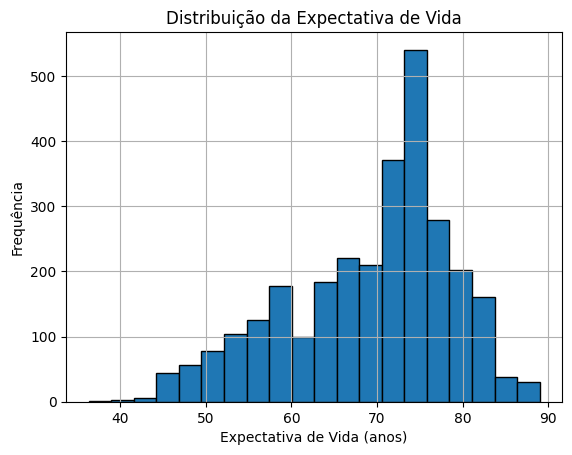

In [57]:
dados['expectativa_vida'].hist(bins=20, edgecolor='black')
plt.title('Distribuição da Expectativa de Vida')
plt.xlabel('Expectativa de Vida (anos)')
plt.ylabel('Frequência')
plt.show()

In [58]:
dados['expectativa_vida'].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: expectativa_vida, dtype: float64

### Resumo estatístico

In [ ]:
# variáveis numéricas
dados.describe()

,ano,expectativa_vida,mortalidade_adulta,mortalidade_infantil,alcool,percentual_gasto,hepatite_b,sarampo,imc,mortalidade_menores_5_anos,polio,gasto_total,difteria,hiv_aids,pib,populacao,magreza_19,magreza_9,composicao_renda,escolaridade
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [60]:
# variáveis categóricas
dados.describe(include=['object'])

,pais,status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [68]:
# Função para o plot da relação da variável alvo com alguns atributos
def plot_relacao(data, alvo, atributos):
    
    # Grupos de linhas com 3 (n) gráficos por linha
    grupos_linhas = [atributos[i:i+3] for i in range(0, len(atributos), 3)]

    # Loop pelos grupos de linhas para criar cada pair plot
    for linha in grupos_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = data, kind = "reg", height = 3)

    return

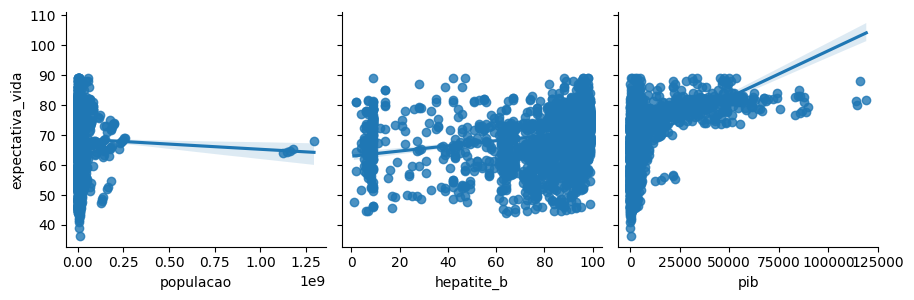

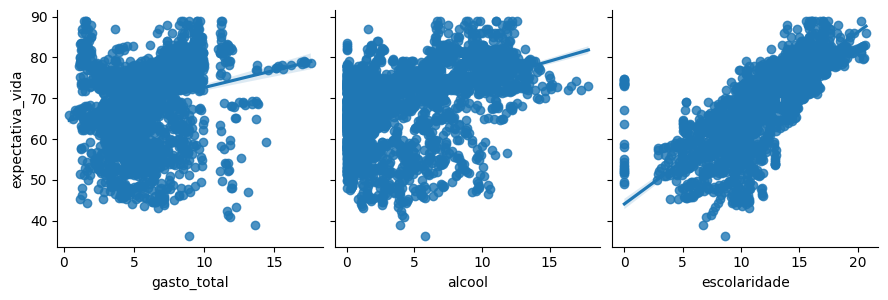

In [73]:
# Variável alvo
alvo = ['expectativa_vida']

# Vamos usar alguns atributos
atributos = ['populacao', 'hepatite_b', 'pib', 'gasto_total', 'alcool', 'escolaridade']

# Verificando outliers
plot_relacao(dados, alvo, atributos)


In [80]:
#Total e percentual de valores ausentes
total = dados.isnull().sum().sort_values(ascending = False)
percentual = (dados.isnull().sum()/dados.isnull().count()*100).sort_values(ascending = False)
valores_ausentes = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])
print(valores_ausentes)

                            Total  Percentual
populacao                     652   22.191967
hepatite_b                    553   18.822328
pib                           448   15.248468
gasto_total                   226    7.692308
alcool                        194    6.603131
composicao_renda              167    5.684139
escolaridade                  163    5.547992
magreza_19                     34    1.157250
magreza_9                      34    1.157250
imc                            34    1.157250
difteria                       19    0.646698
polio                          19    0.646698
expectativa_vida               10    0.340368
mortalidade_adulta             10    0.340368
mortalidade_infantil            0    0.000000
status                          0    0.000000
pais                            0    0.000000
ano                             0    0.000000
mortalidade_menores_5_anos      0    0.000000
sarampo                         0    0.000000
percentual_gasto                0 

### Outliers

In [227]:
# Atributos com mais de 5% de valores missing
atributos = ['populacao', 'hepatite_b', 'pib', 'gasto_total', 'alcool', 'escolaridade'] 

dados2 = dados[atributos]

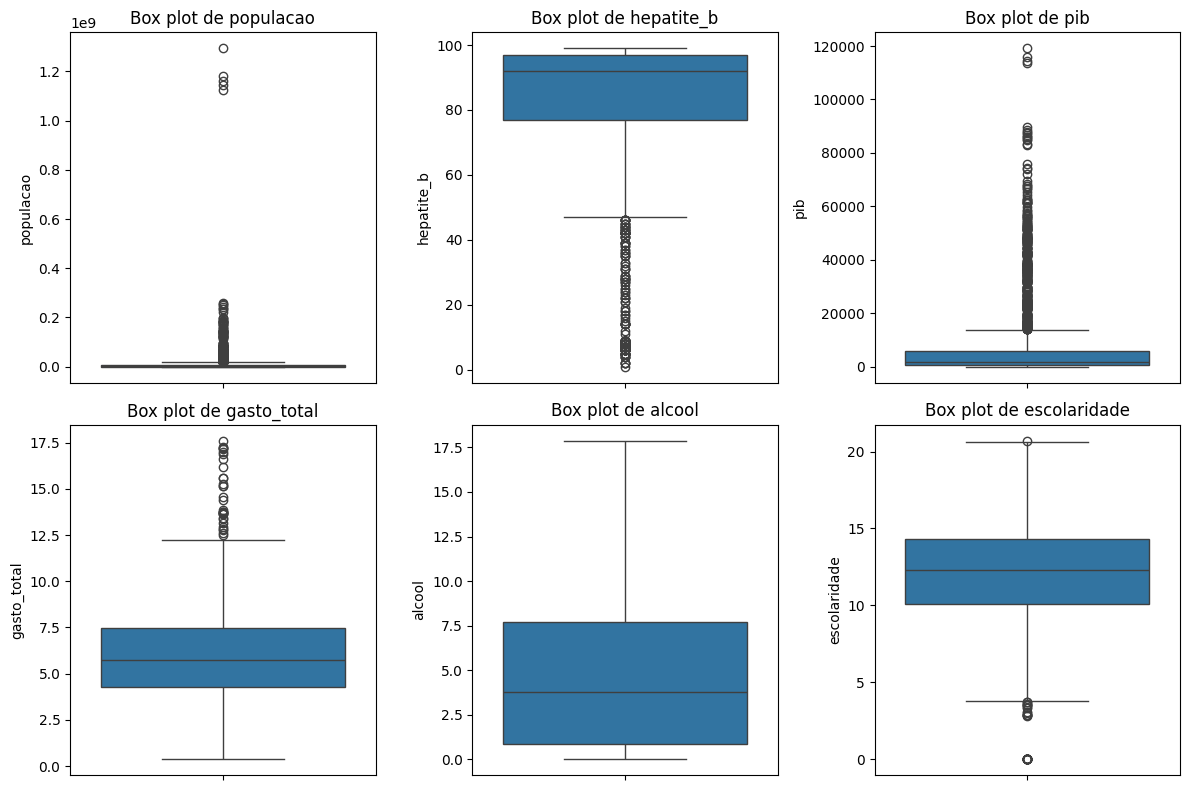

In [228]:
## box plot
plt.figure(figsize=(12, 8))
for i, coluna in enumerate(atributos):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=dados2[coluna])
    plt.title(f'Box plot de {coluna}')
plt.tight_layout()
plt.show()

In [229]:
# Identificação de outliers através do método do IQR (Interquartile Range)
Q1 = dados2.quantile(0.25)
Q3 = dados2.quantile(0.75)
IQR = Q3 - Q1
IQR

populacao       7.224566e+06
hepatite_b      2.000000e+01
pib             5.446871e+03
gasto_total     3.232500e+00
alcool          6.825000e+00
escolaridade    4.200000e+00
dtype: float64

In [230]:
outliers = ((dados2 < (Q1 - 1.5 * IQR)) | (dados2 > (Q3 + 1.5 * IQR))).sum().sort_values(ascending = False)
outliers

pib             365
populacao       294
hepatite_b      254
escolaridade     44
gasto_total      32
alcool            0
dtype: int64

In [231]:
# total e porcentual de outliers
porcent_outliers = pd.DataFrame({'Outliers': outliers, 'Percentual': (outliers / len(dados2)) * 100})

print(porcent_outliers)

              Outliers  Percentual
pib                365   12.423417
populacao          294   10.006807
hepatite_b         254    8.645337
escolaridade        44    1.497617
gasto_total         32    1.089176
alcool               0    0.000000


In [109]:
# Definindo os limites para filtrar os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [214]:
# Filtrando os outliers
novo_df = dados[~((dados2 < limite_inferior) | (dados2 > limite_superior)).any(axis=1)]

In [215]:
# Verificando o total de valores ausentes
novo_df.isnull().sum().sort_values(ascending = False).head()

populacao           494
hepatite_b          391
pib                 376
gasto_total         161
composicao_renda    136
dtype: int64

In [165]:
# Shape
novo_df.shape

(2044, 22)

In [216]:
# Drop das variáveis
novo_df.drop(['pais', 'status'], axis = 1, inplace = True)

In [167]:
print(dados.shape)
print(novo_df.shape)

(2938, 22)
(2044, 20)


## Imputação de dados com a Mediana

In [168]:
#imputação de dados com a Mediana
def imputa_mediana(df):
    return df.fillna(df.median())

In [217]:
novo_df.loc[:,'populacao'] = novo_df['populacao'].transform(imputa_mediana)
novo_df['hepatite_b'] = novo_df['hepatite_b'].transform(imputa_mediana)
novo_df['alcool'] = novo_df['alcool'].transform(imputa_mediana)
novo_df['gasto_total'] = novo_df['gasto_total'].transform(imputa_mediana)
novo_df['pib'] = novo_df['pib'].transform(imputa_mediana)
novo_df['escolaridade'] = novo_df['escolaridade'].transform(imputa_mediana)

In [170]:
novo_df.isnull().sum().sort_values(ascending = False).head()

composicao_renda      136
magreza_9              12
imc                    12
magreza_19             12
mortalidade_adulta      8
dtype: int64

In [218]:
# remove compozição_renda por ter muitos valores missing
novo_df.drop(['composicao_renda'], axis = 1, inplace = True)

In [172]:
# Remove registros com valores nulos
novo_df.dropna(inplace = True)

In [141]:
novo_df.isnull().sum().sort_values(ascending = False).head()

pais                  0
ano                   0
status                0
expectativa_vida      0
mortalidade_adulta    0
dtype: int64

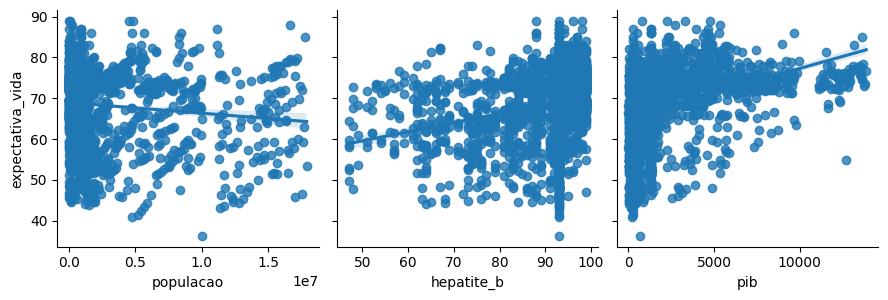

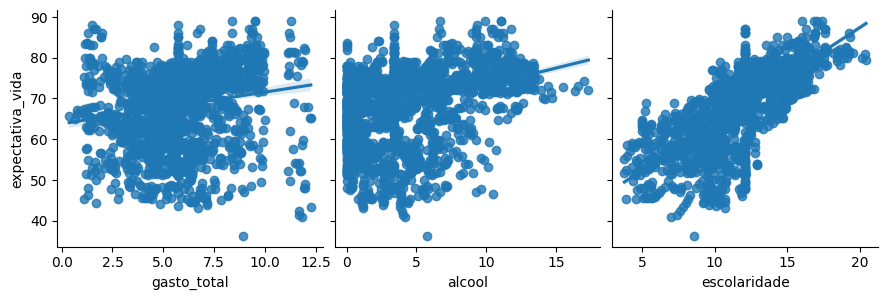

In [149]:
plot_relacao(novo_df, alvo, atributos)

## Engenharia de Recursos

Engenharia de atributos (ou recursos), trata-se da técnica de usar o conhecimento do domínio para selecionar, modificar ou criar novos atributos (também chamados de *features*) a partir dos dados brutos, com o objetivo de melhorar o desempenho dos modelos estatísticos. Essa prática é importante porque a qualidade e a relevância dos atributos inseridos em um modelo têm um impacto significativo na capacidade do modelo de aprender e fazer previsões ou classificações precisas.
Por vezes, dados brutos não estão imediatamente prontos para serem eficazmente utilizados no processo de modelagem, seja devido à presença de ruído, valores faltantes ou simplesmente porque a informação relevante não está sendo apresentada de uma forma que os modelos possam facilmente aproveitar.

Técnicas:

**Seleção de Atributos:** Identificar e selecionar as variáveis mais relevantes para o problema em questão.

**Transformação de Atributos:** Aplicar transformações matemáticas ou estatísticas para alterar a escala ou a distribuição dos dados.

**Criação de Atributos:** Derivar novos atributos a partir dos existentes, por exemplo, combinando duas colunas de dados para criar uma nova que capture uma interação relevante.

**Codificação de Variáveis Categóricas:** Converter variáveis categóricas, como gênero ou país, em uma forma numérica que os modelos de aprendizado de máquina possam processar, utilizando técnicas como codificação one-hot ou ordinal.

**Normalização ou Padronização:** Ajustar a escala dos atributos para que tenham uma distribuição mais uniforme, o que pode ajudar na convergência dos algoritmos de aprendizado.


In [143]:
novo_df.head()

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortalidade_infantil,alcool,percentual_gasto,hepatite_b,sarampo,...,mortalidade_menores_5_anos,polio,gasto_total,difteria,hiv_aids,pib,populacao,magreza_19,magreza_9,escolaridade
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,10.0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,8.9


In [173]:
print(novo_df.populacao.min())
print(novo_df.populacao.max())

34.0
17899562.0


In [220]:
pontos_corte = [novo_df.populacao.quantile(0.33), novo_df.populacao.quantile(0.66)]
print(pontos_corte)

[np.float64(668730.8200000001), np.float64(1275780.7800000012)]


In [221]:
# Criamos uma nova variável com todos os valores preenchidos com 1
novo_df['tamanho_pop'] = 1
# Definimos a faixa onde a variável terá o valor 2
novo_df.loc[(novo_df.populacao < pontos_corte[1]) & (novo_df.populacao > pontos_corte[0]), 'tamanho_pop'] = 2

# Definimos a faixa onde a variável terá o valor 3
novo_df.loc[novo_df.populacao >= pontos_corte[1], 'tamanho_pop'] = 3

In [222]:
novo_df['tamanho_pop'].value_counts()

tamanho_pop
3    695
1    675
2    674
Name: count, dtype: int64

In [223]:
#cria novo atributo unindo imc e consumo de álcool
novo_df['imc_alcool'] = novo_df['imc'] * novo_df['alcool']

In [225]:
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2044 entries, 1 to 2937
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ano                         2044 non-null   int64  
 1   expectativa_vida            2036 non-null   float64
 2   mortalidade_adulta          2036 non-null   float64
 3   mortalidade_infantil        2044 non-null   int64  
 4   alcool                      2044 non-null   float64
 5   percentual_gasto            2044 non-null   float64
 6   hepatite_b                  2044 non-null   float64
 7   sarampo                     2044 non-null   int64  
 8   imc                         2032 non-null   float64
 9   mortalidade_menores_5_anos  2044 non-null   int64  
 10  polio                       2041 non-null   float64
 11  gasto_total                 2044 non-null   float64
 12  difteria                    2041 non-null   float64
 13  hiv_aids                    2044 non-n

###  Análise de multicolinearidade

Correlação de expectativa de vida com todas as outras variáveis

In [226]:
correlacoes = novo_df.corr(numeric_only=True)['expectativa_vida']
print(correlacoes)

ano                           0.201737
expectativa_vida              1.000000
mortalidade_adulta           -0.660886
mortalidade_infantil         -0.207282
alcool                        0.343114
percentual_gasto              0.316605
hepatite_b                    0.255846
sarampo                      -0.115325
imc                           0.558409
mortalidade_menores_5_anos   -0.241309
polio                         0.454612
gasto_total                   0.179614
difteria                      0.485944
hiv_aids                     -0.571314
pib                           0.362166
populacao                    -0.104441
magreza_19                   -0.434199
magreza_9                    -0.429973
escolaridade                  0.709220
tamanho_pop                  -0.123135
imc_alcool                    0.441211
Name: expectativa_vida, dtype: float64


In [209]:
print("Atributos removidos por baixa correlação:")
atributos_removidos = correlacoes[(correlacoes <= 0.3) & (correlacoes >=-0.3)]
print(atributos_removidos)
atributos_removidos = atributos_removidos.index

Atributos removidos por baixa correlação:
ano                           0.204556
mortalidade_infantil         -0.206443
hepatite_b                    0.257860
sarampo                      -0.115350
mortalidade_menores_5_anos   -0.240333
gasto_total                   0.175738
populacao                    -0.105317
tamanho_pop                  -0.120691
Name: expectativa_vida, dtype: float64


In [213]:
# remover atributos com baixa correlação

novo_df2 = novo_df.drop(atributos_removidos)
novo_df2


KeyError: "['ano', 'mortalidade_infantil', 'hepatite_b', 'sarampo', 'mortalidade_menores_5_anos', 'gasto_total', 'populacao', 'tamanho_pop'] not found in axis"